In [2]:
!pip install transformers pillow

In [1]:
from transformers import Blip2Processor, Blip2ForConditionalGeneration
from PIL import Image
import ipywidgets as widgets
from IPython.display import display

In [5]:

# Load BLIP-2 Model and Processor
model_name = "Salesforce/blip2-flan-t5-xl"
processor = Blip2Processor.from_pretrained(model_name)
model = Blip2ForConditionalGeneration.from_pretrained(model_name)


model-00001-of-00002.safetensors:   2%|2         | 210M/9.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.81G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

**Simple VQA**

In [7]:
# Function to process input and get the responsedef answer_question(image_path, question):
def answer_question(image_path, question):
    """
    Answers a question based on the provided image.

    Args:
        image_path (str): Path to the image file.
        question (str): The question to ask.

    Returns:
        str: The generated answer from the model.
    """
    # Open the image
    try:
        image = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        return f"Error: The file '{image_path}' was not found."

    # Process the image and question
    inputs = processor(images=image, text=question, return_tensors="pt").to("cpu")
    output = model.generate(**inputs)

    # Decode the model's output
    answer = processor.decode(output[0], skip_special_tokens=True)
    return answer

In [10]:

import matplotlib.pyplot as plt

In [8]:
# Colab-specific: Upload files
from google.colab import files

# Upload image
print("Please upload your image file:")
uploaded = files.upload()

# Check uploaded files
if uploaded:
    image_path = list(uploaded.keys())[0]  # Get the uploaded image file path
    question = input("Enter your question: ")  # Prompt user for question

    # Generate and print the answer
    print(f"Question: {question}")
    print(f"Answer: {answer_question(image_path, question)}")
else:
    print("No file uploaded.")

Please upload your image file:


Saving heartwarming-moment-between-dog-cat-600nw-2432338827.webp to heartwarming-moment-between-dog-cat-600nw-2432338827.webp
Enter your question: Describe the image
Question: Describe the image


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Answer: of a dog and a cat playing in the grass


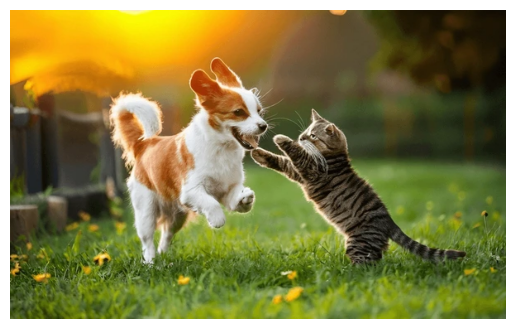

In [11]:
# Display the uploaded image
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()

**Voice Integration**

In [12]:
import requests
from IPython.display import Audio, display

In [26]:
# Sarvam API Configuration
SARVAM_STT_URL = "https://api.sarvam.ai/speech-to-text"  # Replace with actual STT endpoint
SARVAM_TTS_URL = "https://api.sarvam.ai/text-to-speech"  # Replace with actual TTS endpoint
SARVAM_API_KEY = "9ad8976b-6ad1-4994-bea4-87c914bda6db"  # Replace with your API key

# Function for Speech-to-Text
def transcribe_audio(file_path):
    """
    Transcribes audio to text using Sarvam Speech-to-Text API.

    Args:
        file_path (str): Path to the audio file.

    Returns:
        str: Transcribed text from the audio.
    """
    with open(file_path, "rb") as audio_file:
        files = {"file": audio_file}
        headers = {"Authorization": f"Bearer {SARVAM_API_KEY}"}
        response = requests.post(SARVAM_STT_URL, headers=headers, files=files)

        if response.status_code == 200:
            return response.json().get("transcription", "No transcription found.")
        else:
            return f"Error: {response.status_code} - {response.text}"

# Function for Text-to-Speech
def text_to_speech(text, output_path="answer_audio.mp3"):
    """
    Converts text to speech using Sarvam Text-to-Speech API.

    Args:
        text (str): Text to convert to speech.
        output_path (str): Path to save the generated audio.

    Returns:
        str: Path to the generated audio file.
    """
    headers = {
        "Authorization": f"Bearer {SARVAM_API_KEY}",
        "Content-Type": "application/json",
    }
    data = {"text": text}
    response = requests.post(SARVAM_TTS_URL, headers=headers, json=data)

    if response.status_code == 200:
        with open(output_path, "wb") as f:
            f.write(response.content)
        return output_path
    else:
        return f"Error: {response.status_code} - {response.text}"

# Function for BLIP-2 Image-Text QA
def answer_question(image_path, question):
    """
    Answers a question based on the provided image.

    Args:
        image_path (str): Path to the image file.
        question (str): The question to ask.

    Returns:
        str: The generated answer from the model.
    """
    try:
        image = Image.open(image_path).convert("RGB")
    except FileNotFoundError:
        return f"Error: The file '{image_path}' was not found."

    inputs = processor(images=image, text=question, return_tensors="pt").to("cpu")
    output = model.generate(**inputs)
    answer = processor.decode(output[0], skip_special_tokens=True)
    return answer


In [15]:
!pip install ipywidgets gtts

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.4 MB/s eta 0:00:00


In [21]:
# Import required libraries
import io
import wave
import numpy as np
from google.colab import files
from IPython.display import Audio, display
import ipywidgets as widgets
from gtts import gTTS
from IPython.display import Javascript


In [36]:
import time

In [23]:
# Import required libraries
from google.colab import files
from IPython.display import display, Javascript
import io

# Function to record audio using JavaScript
def record_audio():
    display(Javascript('''
        let mediaRecorder;
        let audioChunks = [];

        async function startRecording() {
            const stream = await navigator.mediaDevices.getUser Media({ audio: true });
            mediaRecorder = new MediaRecorder(stream);

            mediaRecorder.ondataavailable = event => {
                audioChunks.push(event.data);
            };

            mediaRecorder.start();
            console.log("Recording started...");
        }

        function stopRecording() {
            mediaRecorder.stop();
            console.log("Recording stopped.");
            mediaRecorder.onstop = () => {
                const audioBlob = new Blob(audioChunks);
                const reader = new FileReader();
                reader.onloadend = function() {
                    google.colab.kernel.invokeFunction('notebook.recorded_audio', [reader.result], {});
                }
                reader.readAsArrayBuffer(audioBlob);
            };
        }

        document.addEventListener('keydown', function(event) {
            if (event.key === "Enter") {
                startRecording();
            } else if (event.key === "Backspace") {
                stopRecording();
            }
        });
    '''))

# Function to handle the recorded audio
def handle_recorded_audio(audio_data):
    audio_path = 'recorded_audio.wav'
    with open(audio_path, 'wb') as f:
        f.write(audio_data)
    print("Audio recorded and saved as:", audio_path)

# Register the audio handler
from google.colab import output
output.register_callback('notebook.recorded_audio', handle_recorded_audio)

# Upload image
print("Please upload your image file:")
image_upload = files.upload()

# Record audio
print("Press Enter to start recording and Backspace to stop recording.")
record_audio()

Please upload your image file:


Saving heartwarming-moment-between-dog-cat-600nw-2432338827.webp to heartwarming-moment-between-dog-cat-600nw-2432338827 (1).webp
Press Enter to start recording and Backspace to stop recording.


<IPython.core.display.Javascript object>

https://products.aspose.app/audio/voice-recorder/wav
use this for now 🥺

In [24]:
# Colab-Specific File Uploads
from google.colab import files
# Upload audio and image files
print("Please upload your audio file for the question:")
audio_upload = files.upload()

print("Please upload your image file:")
image_upload = files.upload()



Please upload your audio file for the question:


Saving heartwarming-moment-between-dog-cat-600nw-2432338827.webp to heartwarming-moment-between-dog-cat-600nw-2432338827 (2).webp
Please upload your image file:


Saving record_out(2).wav to record_out(2).wav


In [46]:
SARVAM_STT_URL = "https://api.sarvam.ai/speech-to-text"
SARVAM_TTS_URL = "https://api.sarvam.ai/text-to-speech"
SARVAM_API_KEY = "9ad8976b-6ad1-4994-bea4-87c914bda6db"


In [40]:
def play_audio(audio_path):
    """Play the audio file using IPython's Audio display."""
    print("Playing audio question...")
    display(Audio(audio_path, autoplay=True))
    # Give some time for audio to play
    time.sleep(2)

In [41]:
def transcribe_audio(file_path):
    """Transcribe audio to text using Sarvam STT API."""
    print("Transcribing audio to text...")
    with open(file_path, "rb") as audio_file:
        files = {"file": audio_file}
        headers = {"Authorization": f"Bearer {SARVAM_API_KEY}"}
        response = requests.post(SARVAM_STT_URL, headers=headers, files=files)

        if response.status_code == 200:
            transcription = response.json().get("transcription", "No transcription found.")
            print(f"Transcribed text: {transcription}")
            return transcription
        else:
            error_msg = f"Transcription Error: {response.status_code} - {response.text}"
            print(error_msg)
            return error_msg

In [42]:
def answer_question(image_path, question):
    """Generate answer using VQA model."""
    print("Generating answer using VQA model...")
    try:
        image = Image.open(image_path).convert("RGB")
        inputs = processor(images=image, text=question, return_tensors="pt").to("cpu")
        output = model.generate(**inputs)
        answer = processor.decode(output[0], skip_special_tokens=True)
        print(f"Generated answer: {answer}")
        return answer
    except FileNotFoundError:
        error_msg = f"Error: Image file '{image_path}' not found."
        print(error_msg)
        return error_msg
    except Exception as e:
        error_msg = f"VQA Error: {str(e)}"
        print(error_msg)
        return error_msg

In [43]:
def text_to_speech(text, output_path="answer_audio.wav"):
    """Convert answer text to speech using Sarvam TTS API."""
    print("Converting answer to speech...")
    headers = {
        "Authorization": f"Bearer {SARVAM_API_KEY}",
        "Content-Type": "application/json",
    }
    data = {"text": text}
    response = requests.post(SARVAM_TTS_URL, headers=headers, json=data)

    if response.status_code == 200:
        with open(output_path, "wb") as f:
            f.write(response.content)
        print(f"Speech generated and saved to: {output_path}")
        return output_path
    else:
        error_msg = f"TTS Error: {response.status_code} - {response.text}"
        print(error_msg)
        return error_msg

In [44]:
def run_sequential_vqa():
    """Main function to run the VQA system sequentially."""
    # Step 1: Upload files
    print("Please upload your audio question file:")
    audio_upload = files.upload()

    print("Please upload your image file:")
    image_upload = files.upload()

    if not (audio_upload and image_upload):
        print("Error: Both audio and image files are required.")
        return

    # Get file paths
    audio_path = list(audio_upload.keys())[0]
    image_path = list(image_upload.keys())[0]

    # Step 2: Play the audio question
    play_audio(audio_path)

    # Step 3: Transcribe audio to text
    question = transcribe_audio(audio_path)
    if "Error" in question:
        return

    # Step 4: Generate answer using VQA
    answer = answer_question(image_path, question)
    if "Error" in answer:
        return

    # Step 5: Convert answer to speech
    answer_audio_path = text_to_speech(answer)
    if "Error" not in answer_audio_path:
        # Play generated answer
        print("Playing generated answer...")
        display(Audio(answer_audio_path, autoplay=True))

        # Offer download option
        print("\nDownload generated answer audio:")
        files.download(answer_audio_path)



In [45]:
# Execute the VQA system
run_sequential_vqa()


Please upload your audio question file:


Saving heartwarming-moment-between-dog-cat-600nw-2432338827 (1).webp to heartwarming-moment-between-dog-cat-600nw-2432338827 (1) (3).webp
Please upload your image file:


Saving record_out(2).wav to record_out(2) (3).wav
Playing audio question...


Transcribing audio to text...
Transcription Error: 403 - {"error":{"message":"Subscription key is not provided","code":"invalid_api_key_error"}}
